<a href="https://colab.research.google.com/github/RajniHarsha27/Debt-Relief/blob/main/Freedom_Debt_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, f_oneway , chi2_contingency

In [3]:
!gdown --fuzzy https://drive.google.com/file/d/1CqLmI60cx3l3xIgkBEyHwhrEIe3jeh2V/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1Mb2VrMuy8yTBzAX10im2c-CkCwIQ8DA2/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1aqXI-5voajWQDDJMbdmvjx3SeBYzpgFI/view?usp=sharing


Downloading...
From: https://drive.google.com/uc?id=1CqLmI60cx3l3xIgkBEyHwhrEIe3jeh2V
To: /content/calendar.csv
100% 2.93k/2.93k [00:00<00:00, 8.72MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Mb2VrMuy8yTBzAX10im2c-CkCwIQ8DA2
To: /content/clients.csv
100% 1.38M/1.38M [00:00<00:00, 24.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aqXI-5voajWQDDJMbdmvjx3SeBYzpgFI
To: /content/deposits.csv
100% 26.9M/26.9M [00:00<00:00, 66.2MB/s]



> **Freedom recently launched a marketing campaign aimed at highlighting the benefits of its debt relief program in helping individuals attain financial freedom. The campaign, which had a budget of $5 million, ran during the third month of our five-month data collection period. Now, we want to demonstrate the campaign's success to the marketing, sales, and operations teams.**



In [4]:
#  read all 3 data in dataframe

df_calendar = pd.read_csv('/content/calendar.csv')
df_clients = pd.read_csv('/content/clients.csv')
df_deposits = pd.read_csv('/content/deposits.csv')


In [5]:
# First, convert deposit_date and gregorian_date to datetime for accurate merging
df_deposits['deposit_date'] = pd.to_datetime(df_deposits['deposit_date'])
df_calendar['gregorian_date'] = pd.to_datetime(df_calendar['gregorian_date'])



In [6]:
merged_data = pd.merge(df_clients, df_deposits, on='client_id')
merged_data = pd.merge(merged_data, df_calendar, left_on='deposit_date', right_on="gregorian_date")
merged_data.head()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,gregorian_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,2019-07-11,Month 2
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,2019-07-11,Month 2
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,2019-07-11,Month 2


In [7]:

merged_data = merged_data.drop('gregorian_date', axis=1)

**Analysis of change in number of client and deposits_amount monthly**

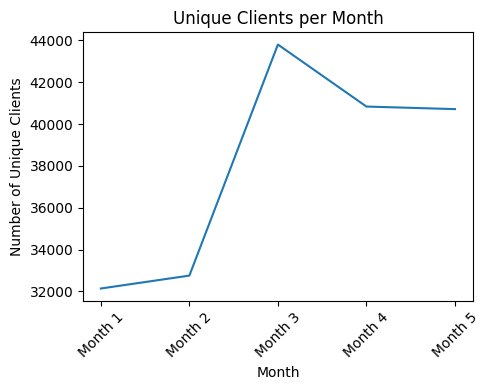

In [9]:

#  unique active clients each month

monthly_active_clients = merged_data.groupby('month_name')['client_id'].nunique()



# Create a line plot
plt.figure(figsize=(5, 4))
plt.plot(monthly_active_clients.index.astype(str), monthly_active_clients.values)
plt.xlabel('Month')
plt.ylabel('Number of Unique Clients')
plt.title('Unique Clients per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


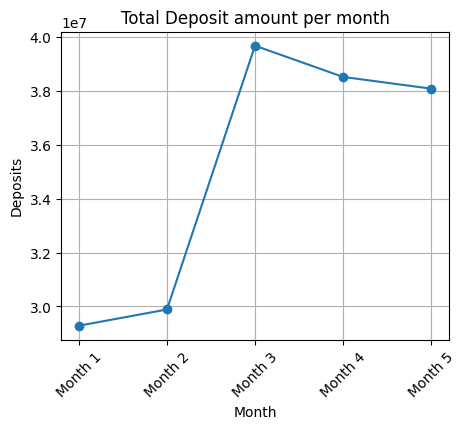

In [10]:
# variation in  deposit per month


deposit_counts_by_month = merged_data.groupby('month_name')['deposit_amount'].sum()

# Create the plot
plt.figure(figsize=(5, 4))
plt.plot(deposit_counts_by_month.index, deposit_counts_by_month.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Deposits')
plt.title('Total Deposit amount per month')
plt.xticks(rotation=45)
plt.grid(True)  # Add a grid for better readability
plt.show()


month_name
Month 1          NaN
Month 2     2.054307
Month 3    32.752742
Month 4    -2.921829
Month 5    -1.128483
Name: deposit_amount, dtype: float64


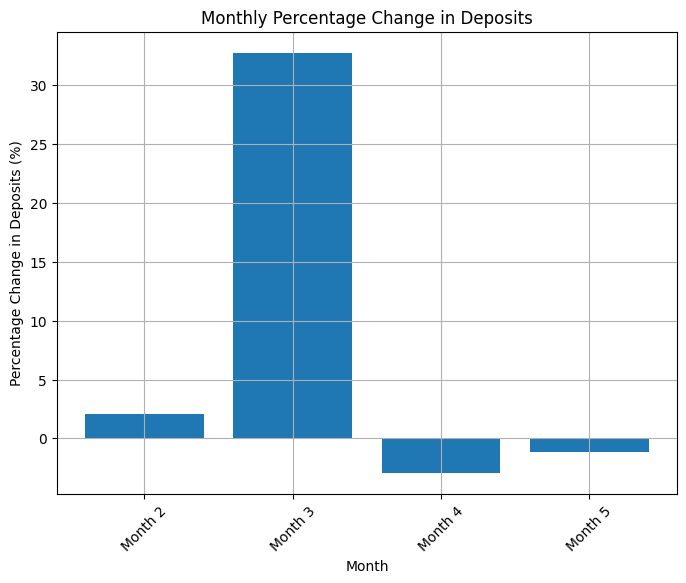

In [27]:
# percentage change for each month

# Calculate the percentage change in deposits for each month compared to the previous month.
monthly_deposits = merged_data.groupby('month_name')['deposit_amount'].sum()
percentage_changes = monthly_deposits.pct_change() * 100

print(percentage_changes)

# You can also visualize these percentage changes using a bar chart:
plt.figure(figsize=(8, 6))
plt.bar(percentage_changes.index, percentage_changes.values)
plt.xlabel('Month')
plt.ylabel('Percentage Change in Deposits (%)')
plt.title('Monthly Percentage Change in Deposits')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# visualization of deposit_cadence and deposit type





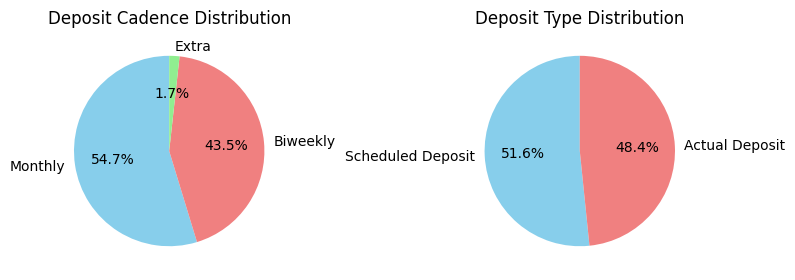

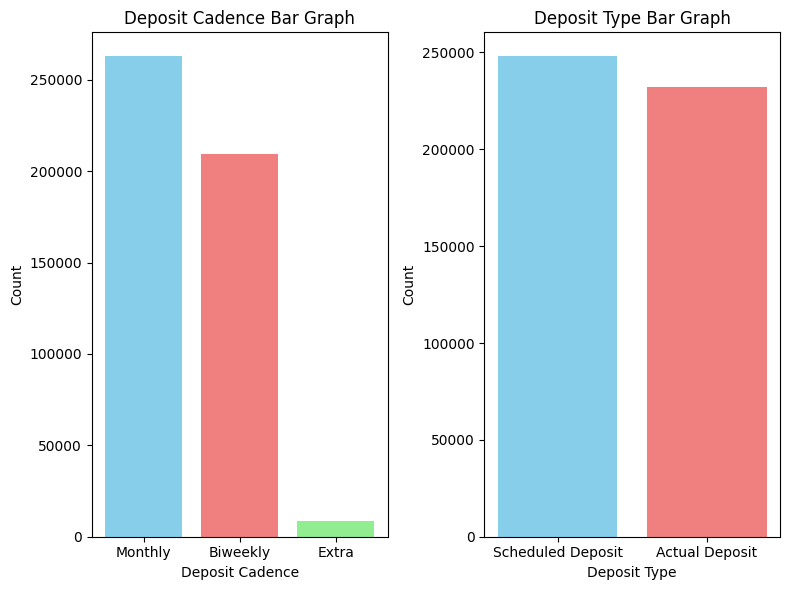

In [11]:
# pie chart of deposit_cadence and deposit type


# Pie chart for deposit_cadence and deposit_type side by side
plt.figure(figsize=(8, 6))  # Adjust the figure size to make it wider

plt.subplot(1, 2, 1)  # Create a subplot for the first pie chart
cadence_counts = merged_data['deposit_cadence'].value_counts()
plt.pie(cadence_counts.values, labels=cadence_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Deposit Cadence Distribution')

plt.subplot(1, 2, 2)  # Create a subplot for the second pie chart
type_counts = merged_data['deposit_type'].value_counts()
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Deposit Type Distribution')

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

# Bar graph for deposit_cadence
plt.figure(figsize=(8, 6))  # Adjust the figure size to make it wider

plt.subplot(1, 2, 1)  # Create a subplot for the first bar graph
cadence_counts = merged_data['deposit_cadence'].value_counts()
plt.bar(cadence_counts.index, cadence_counts.values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Deposit Cadence')
plt.ylabel('Count')
plt.title('Deposit Cadence Bar Graph')

# Bar graph for deposit_type
plt.subplot(1, 2, 2)  # Create a subplot for the second bar graph
type_counts = merged_data['deposit_type'].value_counts()
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.title('Deposit Type Bar Graph')

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()


In [12]:
merged_data['client_age'].describe()

,client_age
count,480394.000000
mean,52.192469
std,13.773928
min,21.000000
25%,41.000000
50%,52.000000
75%,62.000000
max,105.000000


# ***distribution of client age***

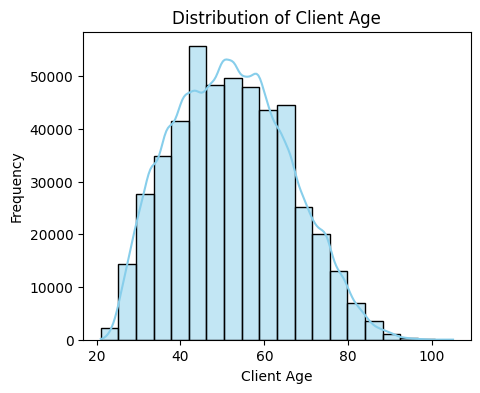

In [13]:


plt.figure(figsize=(5, 4))
sns.histplot(merged_data['client_age'], bins=20, kde=True, color='skyblue')
plt.xlabel('Client Age')
plt.ylabel('Frequency')
plt.title('Distribution of Client Age')
plt.show()


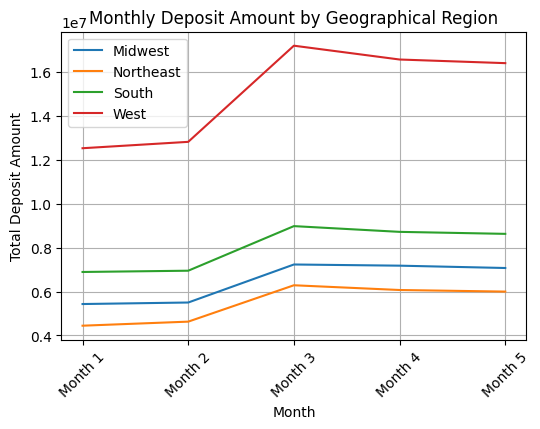

In [14]:
# line graph of monthly client_geographical_region',  of deposit amount

# Group by month and client_geographical_region, then sum deposit_amount
monthly_region_deposits = merged_data.groupby(['month_name', 'client_geographical_region'])['deposit_amount'].sum().unstack()

# Create the line plot
plt.figure(figsize=(6, 4))
for region in monthly_region_deposits.columns:
  plt.plot(monthly_region_deposits.index, monthly_region_deposits[region], label=region)

plt.xlabel('Month')
plt.ylabel('Total Deposit Amount')
plt.title('Monthly Deposit Amount by Geographical Region')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()





In [15]:
#dividing client on different age group
# Define the age bins
bins = [20, 35, 50, 65, 80, 110]  # Adjust as needed

# Create age group labels
labels = ['20-35', '35-50', '50-65', '65-80', '80+']

# Use pd.cut to categorize clients into age groups
merged_data['age_group'] = pd.cut(merged_data['client_age'], bins=bins, labels=labels, include_lowest=True)

# Group by age group and count the number of unique clients in each group
client_count_by_age_group = merged_data.groupby('age_group')['client_id'].nunique()

print(client_count_by_age_group)


age_group
20-35     5666
35-50    15185
50-65    15835
65-80     8502
80+       1159
Name: client_id, dtype: int64


<ipython-input-15-54c414bef17c>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  client_count_by_age_group = merged_data.groupby('age_group')['client_id'].nunique()




>  **Insights:** middle aged group are larger in number.




---





**client_residence_status of every region**

client_residence_status       Own  Rent
client_geographical_region             
Midwest                      5723  2428
Northeast                    5772  1620
South                        6899  3658
West                        15551  4696


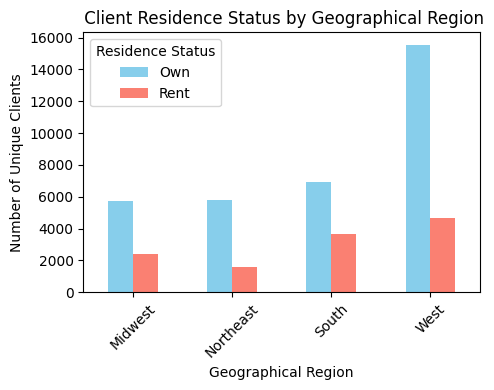

In [16]:
# client_residence_status of every region

# Group by client_geographical_region and client_residence_status, and count the unique client_id
residence_status_by_region_unique = merged_data.groupby(['client_geographical_region', 'client_residence_status'])['client_id'].nunique().unstack()

# Display the result
print(residence_status_by_region_unique)

# Optional: Visualize the data using a bar chart
residence_status_by_region_unique.plot(kind='bar', figsize=(5, 4),color=['skyblue', 'salmon', 'lightgreen'])
plt.title(' Client Residence Status by Geographical Region')
plt.xlabel('Geographical Region')
plt.ylabel('Number of Unique Clients')
plt.xticks(rotation=45)
plt.legend(title='Residence Status')
plt.tight_layout()
plt.show()


In [17]:
#  1st 2 month average vs last 3 months average of deposit

# Calculate the average deposit for the first 2 months
first_two_months = (merged_data[merged_data['month_name'].isin(['Month 1', 'Month 2'])]['deposit_amount'].sum())
first_two_months_avg = first_two_months / 2

# Calculate the average deposit for the last 3 months
last_three_months_avg = merged_data[merged_data['month_name'].isin(['Month 3', 'Month 4', 'Month 5'])]['deposit_amount'].sum()
last_three_months_avg /= 3

# Print the results
print(f"Average monthly deposit for the first 2 months: {first_two_months_avg:.2f}")
print(f"Average monthly for the last 3 months: {last_three_months_avg:.2f}")


Average monthly deposit for the first 2 months: 29585631.07
Average monthly for the last 3 months: 38757350.69


In [18]:

percentage_increase = ((last_three_months_avg - first_two_months_avg) / first_two_months_avg) * 100

print(f"Percentage increase in deposit from the first 2 months to the last 3 months: {percentage_increase:.2f}%")


Percentage increase in deposit from the first 2 months to the last 3 months: 31.00%


average of 31% increase in deposit amount.




# PERFORM hypothesis test on deposit_amount.
*  Null Hypothesis (H₀): The mean deposit amounts across the pre-campaign (Month 1 AND Month 2,)  and post-campaign periods are the same.
* **Alternative** Hypothesis (H₁): They are different.



In [19]:
# PERFORM T TEST ON deposit_amount Null Hypothesis (H₀): The mean deposit amounts across the pre-campaign (MONTH 1 AND MONTH 2,)  and post-campaign periods are the same.
# Alternative Hypothesis (H₁): THEY ARE DIFFERENT

# Separate data into pre-campaign and post-campaign groups
pre_campaign_deposits = merged_data[merged_data['month_name'].isin(['Month 1', 'Month 2'])]['deposit_amount']
post_campaign_deposits = merged_data[merged_data['month_name'].isin(['Month 3', 'Month 4', 'Month 5'])]['deposit_amount']

# Perform an independent samples t-test
t_statistic, p_value = ttest_ind(pre_campaign_deposits, post_campaign_deposits)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("We reject the null hypothesis. There is a statistically significant difference in the mean deposit amounts between the pre-campaign and post-campaign periods.")
else:
    print("We fail to reject the null hypothesis. There is no statistically significant difference in the mean deposit amounts between the pre-campaign and post-campaign periods.")


T-statistic: 12.908015490816673
P-value: 4.1159272965803093e-38
We reject the null hypothesis. There is a statistically significant difference in the mean deposit amounts between the pre-campaign and post-campaign periods.


**Conclusion**:
 The significant difference in mean deposits suggests that the marketing campaign and the post-campaign period had a measurable impact on deposit behavior. The increase in deposits during the campaign and post-campaign periods compared to the pre-campaign period is statistically significant.


In [21]:
#  the additional deposits generated during the campaign and post-campaign period compared to the pre-campaign period. give data in million

# Calculate total deposits during the pre-campaign period (Month 1 and Month 2) per month
pre_campaign_total_deposits = merged_data[merged_data['month_name'].isin(['Month 1', 'Month 2'])]['deposit_amount'].sum()
pre_campaign_total_deposits=pre_campaign_total_deposits/2
# Calculate avg deposits during the campaign and post-campaign period (Month 3, Month 4, and Month 5) per month
campaign_post_campaign_total_deposits = merged_data[merged_data['month_name'].isin(['Month 3', 'Month 4', 'Month 5'])]['deposit_amount'].sum()
campaign_post_campaign_total_deposits=campaign_post_campaign_total_deposits/3
# Calculate the additional deposits generated
additional_deposits = campaign_post_campaign_total_deposits - pre_campaign_total_deposits

# Convert to millions
additional_deposits_in_millions = additional_deposits / 1000000

print(f"Additional deposits generated during the campaign and post-campaign period (in millions) per month: {additional_deposits_in_millions:.2f} million")


Additional deposits generated during the campaign and post-campaign period (in millions) per month: 9.17 million


**new client who join in month 3**

In [22]:
#  new client join in month 3

# Filter the data for clients whose first deposit was in Month 3
new_clients_month3 = merged_data[
    (merged_data['month_name'] == 'Month 3') &
    (merged_data.groupby('client_id')['deposit_date'].transform('min') == merged_data['deposit_date'])
]

# Count the number of unique new clients in Month 3
num_new_clients_month3 = new_clients_month3['client_id'].nunique()

print(f"Number of new clients who joined in during campaign: {num_new_clients_month3}")


Number of new clients who joined in during campaign: 11544


In [23]:
# additional deposit between month 3 4 and 5 of age group between 21 and 40

# Filter the data for clients aged 21 to 40 and for months 3, 4, and 5
age_group_campaign_data = merged_data[
    (merged_data['client_age'] >= 21) &
    (merged_data['client_age'] <= 40) &
    (merged_data['month_name'].isin(['Month 3', 'Month 4', 'Month 5']))
]

# Calculate total deposits during the campaign and post-campaign period (Month 3, Month 4, and Month 5) per month for the age group
campaign_post_campaign_total_deposits_age_group = age_group_campaign_data['deposit_amount'].sum()

# Calculate total deposits during the pre-campaign period (Month 1 and Month 2) per month for the age group
age_group_pre_campaign_data = merged_data[
    (merged_data['client_age'] >= 21) &
    (merged_data['client_age'] <= 40) &
    (merged_data['month_name'].isin(['Month 1', 'Month 2']))
]
pre_campaign_total_deposits_age_group = age_group_pre_campaign_data['deposit_amount'].sum()
pre_campaign_total_deposits_age_group = pre_campaign_total_deposits_age_group/2
campaign_post_campaign_total_deposits_age_group = campaign_post_campaign_total_deposits_age_group/3


# Calculate the additional deposits generated for the age group
additional_deposits_age_group = campaign_post_campaign_total_deposits_age_group - pre_campaign_total_deposits_age_group

# Convert to millions
additional_deposits_in_millions_age_group = additional_deposits_age_group / 1000000


print(f"Additional deposits generated during the campaign and post-campaign period for age group 21-40 (in millions): {additional_deposits_in_millions_age_group:.2f} million")



Additional deposits generated during the campaign and post-campaign period for age group 21-40 (in millions): 2.33 million




> **campaign performance if we did not run the campaign in Month 3, but instead postponed it until month 6?**



In [24]:
#growth rate from month 1 to month 2

# Calculate total deposits for Month 1
month1_deposits = merged_data[merged_data['month_name'] == 'Month 1']['deposit_amount'].sum()

# Calculate total deposits for Month 2
month2_deposits = merged_data[merged_data['month_name'] == 'Month 2']['deposit_amount'].sum()

# Calculate the growth rate
growth_rate = ((month2_deposits - month1_deposits) / month1_deposits) * 100

print(f"Growth rate from Month 1 to Month 2: {growth_rate:.2f}%")


Growth rate from Month 1 to Month 2: 2.05%


In [25]:
# finding hypothetically month 3 month 4 and month 5 monthly deposit with same growth rate

# Calculate hypothetical deposits for Month 3, Month 4, and Month 5 based on the growth rate from Month 1 to Month 2
month3_hypothetical_deposits = month2_deposits * (1 + growth_rate / 100)
month4_hypothetical_deposits = month3_hypothetical_deposits * (1 + growth_rate / 100)
month5_hypothetical_deposits = month4_hypothetical_deposits * (1 + growth_rate / 100)

print(f"Hypothetical deposits for Month 3: {month3_hypothetical_deposits:.2f}")
print(f"Hypothetical deposits for Month 4: {month4_hypothetical_deposits:.2f}")
print(f"Hypothetical deposits for Month 5: {month5_hypothetical_deposits:.2f}")


Hypothetical deposits for Month 3: 30500390.40
Hypothetical deposits for Month 4: 31126962.14
Hypothetical deposits for Month 5: 31766405.59


In [26]:
#  actual month 3 month 4 and month 5 deposit

# Calculate actual deposits for Month 3, Month 4, and Month 5
month3_actual_deposits = merged_data[merged_data['month_name'] == 'Month 3']['deposit_amount'].sum()
month4_actual_deposits = merged_data[merged_data['month_name'] == 'Month 4']['deposit_amount'].sum()
month5_actual_deposits = merged_data[merged_data['month_name'] == 'Month 5']['deposit_amount'].sum()

print(f"Actual deposits for Month 3: {month3_actual_deposits:.2f}")
print(f"Actual deposits for Month 4: {month4_actual_deposits:.2f}")
print(f"Actual deposits for Month 5: {month5_actual_deposits:.2f}")


Actual deposits for Month 3: 39675057.10
Actual deposits for Month 4: 38515819.73
Actual deposits for Month 5: 38081175.23


In [28]:
# percentage change for each month actual to hypotheical

# Calculate the percentage change for each month (actual vs. hypothetical)
month3_percentage_change = ((month3_actual_deposits - month3_hypothetical_deposits) / month3_hypothetical_deposits) * 100
month4_percentage_change = ((month4_actual_deposits - month4_hypothetical_deposits) / month4_hypothetical_deposits) * 100
month5_percentage_change = ((month5_actual_deposits - month5_hypothetical_deposits) / month5_hypothetical_deposits) * 100

print(f"Percentage change for Month 3: {month3_percentage_change:.2f}%")
print(f"Percentage change for Month 4: {month4_percentage_change:.2f}%")
print(f"Percentage change for Month 5: {month5_percentage_change:.2f}%")


Percentage change for Month 3: 30.08%
Percentage change for Month 4: 23.74%
Percentage change for Month 5: 19.88%




> **If the campaign was run in Month 6, we assume a similar impact to what we saw in Month 3:**





In [34]:


#aactual percentage change of deposit amount to previous month
# Month 1          NaN
# Month 2     2.054307
# Month 3    32.752742(this growth is now for month 6)
# Month 4    -2.921829
# Month 5    -1.128483

# Calculate hypothetical deposits for Month 6, Month 7, and Month 8 based on the growth rate from Month 1 to Month 2 and the impact of the campaign
month6_hypothetical_deposits_with_campaign = month5_hypothetical_deposits * (1 +  32.752742/ 100)
month7_hypothetical_deposits_with_campaign = month6_hypothetical_deposits_with_campaign * (1 - 2.921829 / 100)
month8_hypothetical_deposits_with_campaign = month7_hypothetical_deposits_with_campaign * (1 - 1.128483 / 100)

print(f"Hypothetical deposits for Month 6 with Campaign: {month6_hypothetical_deposits_with_campaign:.2f}")
print(f"Hypothetical deposits for Month 7 with Campaign: {month7_hypothetical_deposits_with_campaign:.2f}")
print(f"Hypothetical deposits for Month 8 with Campaign: {month8_hypothetical_deposits_with_campaign:.2f}")




Hypothetical deposits for Month 6 with Campaign: 42170774.45
Hypothetical deposits for Month 7 with Campaign: 40938616.53
Hypothetical deposits for Month 8 with Campaign: 40476631.20


In [37]:


total_hypothetical_deposits_month6_8 = (month6_hypothetical_deposits_with_campaign + month7_hypothetical_deposits_with_campaign + month8_hypothetical_deposits_with_campaign) / 1000000

print(f"Total Hypothetical Deposits for Month 6-8 (in millions): {total_hypothetical_deposits_month6_8:.2f} million")


Total Hypothetical Deposits for Month 6-8 (in millions): 123.59 million


**Insights:**'
* During the month the campaign was active, Freedom Debt Relief saw an increase of nearly 10 million in deposit amounts compared to the previous months.
* In the months following the campaign, the total deposit amounts began to gradually decline, but they remained significantly higher than pre-campaign levels — with 8.5 million in month 4 and 8 million in month 5. Given that the campaign cost was 5 million, the total increase in deposits during and after the campaign amounted to 26.5 million dollar.
* according to the company's website (18% fees on deposits returned),that's why only a gross profit of 4.7M dollars,resulting in a net loss of around 23,000 dollar.
* The campaign resulted in a notable increase in deposits, especially in Month 3, with a 30.1% rise compared to expected growth. Even in Months 4 and 5, deposits stayed significantly above projections, though the incremental gains declined to 23.7% and 19.9%, respectively.
* Number of new clients who joined in during campaign is : 11544


* If the campaign had been postponed to Month 6 Total  Deposits for Month 6-8 (in millions) would have been 123.59 million dollar.
* Middle aged people, house owners and the people living in west ,they are depositing more amount.


**Suggestion:**
* Focus on middle aged person.
* Design campaign keeping in mind the person having own house (they are the target customer).
* Implement Reminder Campaigns to Sustain Engagement:The campaign showed a strong initial boost, but the impact started to decline after the campaign period. This suggests that while the initial message was effective, the long-term engagement could be improved.

